In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from scipy.ndimage import label, center_of_mass
import trackpy as tp
import pandas as pd

In [2]:
frames = tifffile.imread('data/ParticuleTracking01.tif')

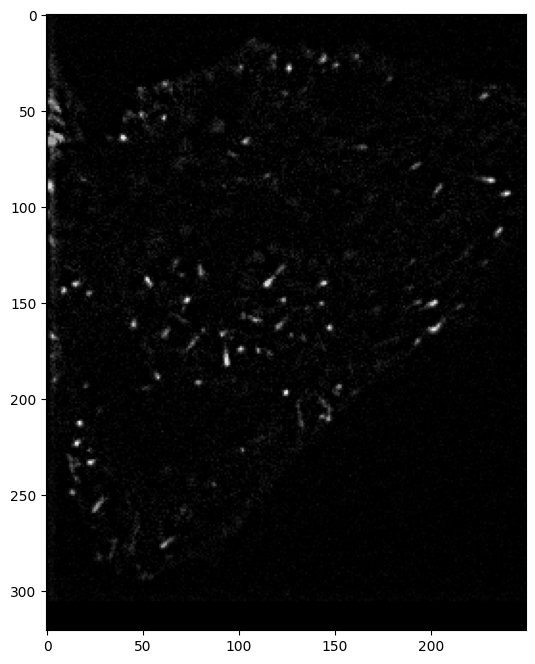

In [3]:
plt.figure(figsize=(10, 8))
plt.imshow(frames[0], cmap='gray')

In [5]:
from particle_tracking import track_with_nearest_neighbor,track_with_trackpy

In [6]:
threshold = 100  
max_distance = 10

In [7]:
# Number of frames and image dimensions
num_frames = len(frames)
height, width = frames[0].shape


In [8]:
nearest_neighbor_trajectories = track_with_nearest_neighbor(frames)

In [9]:
num_trajectories = len(nearest_neighbor_trajectories)  # Assuming 'trajectories' is a list of tracked particle paths
colors = np.random.randint(0, 255, size=(num_trajectories, 3))

In [10]:
import cv2

In [11]:
def color_sequence(trajectories):
    colored_sequence = []

    # Iterate over each frame to add colored particles
    for frame_idx in range(num_frames):
        # Create a blank RGB image to draw on
        overlay = np.zeros((height, width, 3), dtype=np.uint8)
        
        # Draw each particle's position if it exists in the current frame
        for traj_idx, traj in enumerate(trajectories):
            if frame_idx < len(traj):
                # Get the particle's position at this frame
                y, x = traj[frame_idx]  # Note: row, column format for y, x
                
                # Draw a small circle at the particle's position
                cv2.circle(overlay, (int(x), int(y)), radius=3, color=colors[traj_idx].tolist(), thickness=-1)

        # Convert the current frame to RGB if it's grayscale
        if len(frames[frame_idx].shape) == 2:  # Check if it's a grayscale image
            colored_frame = cv2.cvtColor(frames[frame_idx].astype(np.uint8), cv2.COLOR_GRAY2RGB)
        else:
            colored_frame = frames[frame_idx].astype(np.uint8)
        # Overlay the particles onto the original frame (optional)
        colored_frame = cv2.addWeighted(colored_frame, 0.6, overlay, 0.4, 0)
        
        # Add the colored frame to the sequence
        colored_sequence.append(colored_frame)
    return colored_sequence


In [12]:
colored_sequence = color_sequence(nearest_neighbor_trajectories)

In [13]:
from utils import save_as_video,save_as_tiff

In [93]:
save_as_video(colored_sequence, 'tracked_particles.avi', fps=30)

Video saved as: tracked_particles.avi


In [14]:
from kalman_filter import track_with_kalman_filter,track_with_modified_kalman

In [15]:
kalman_trajectories = track_with_kalman_filter(frames)

In [16]:
modified_kalman_trajectories = track_with_modified_kalman(frames)

In [17]:
num_trajectories = len(modified_kalman_trajectories)
colors = np.random.randint(0, 255, size=(num_trajectories, 3))

In [18]:
colored_sequence = color_sequence(modified_kalman_trajectories)


In [19]:
save_as_video(colored_sequence, 'tracked_particles4.avi', fps=30)

Video saved as: tracked_particles4.avi


In [97]:
trackpy_trajectories = track_with_trackpy(frames)

Frame 270: 12 trajectories present.


In [67]:
num_trajectories = len(trackpy_trajectories)
colors = np.random.randint(0, 255, size=(num_trajectories, 3))

In [68]:
colored_sequence = color_sequence(trackpy_trajectories)


In [69]:
save_as_video(colored_sequence, 'tracked_particles3.avi', fps=30)

Video saved as: tracked_particles3.avi


In [20]:
from utils import calculate_metrics

In [22]:
trackpy_trajectories = track_with_trackpy(frames)
nearest_neighbor_trajectories = track_with_nearest_neighbor(frames)
kalman_trajectories = track_with_kalman_filter(frames)
modified_kalman_trajectories = track_with_modified_kalman(frames)

# Calculate metrics for each method
metrics_trackpy = calculate_metrics(trackpy_trajectories, "Trackpy")
metrics_nearest_neighbor = calculate_metrics(nearest_neighbor_trajectories, "Nearest Neighbor")
metrics_kalman = calculate_metrics(kalman_trajectories, "Kalman Filter")
metrics_modified_kalman = calculate_metrics(modified_kalman_trajectories, "Modified Kalman Filter")

Frame 270: 12 trajectories present.


Method: Trackpy
Number of Trajectories: 1241
Average Length of Trajectories: 2.77 frames
Average Displacement per Frame: 1.54 pixels
Method: Nearest Neighbor
Number of Trajectories: 679
Average Length of Trajectories: 46.11 frames
Average Displacement per Frame: 2.90 pixels
Method: Kalman Filter
Number of Trajectories: 133
Average Length of Trajectories: 270.00 frames
Average Displacement per Frame: 2.72 pixels
Method: Modified Kalman Filter
Number of Trajectories: 582
Average Length of Trajectories: 1.00 frames
Average Displacement per Frame: nan pixels


c:\Users\khell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\khell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [29]:
metrics_df = pd.DataFrame([metrics_trackpy, metrics_nearest_neighbor, metrics_kalman,metrics_modified_kalman])

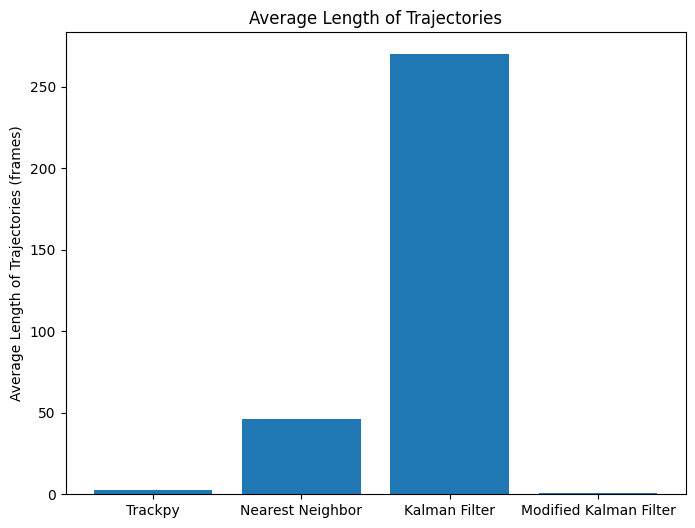

In [30]:
# Bar plot of average lengths
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['method'], metrics_df['avg_length'])
plt.ylabel('Average Length of Trajectories (frames)')
plt.title('Average Length of Trajectories')
plt.show()

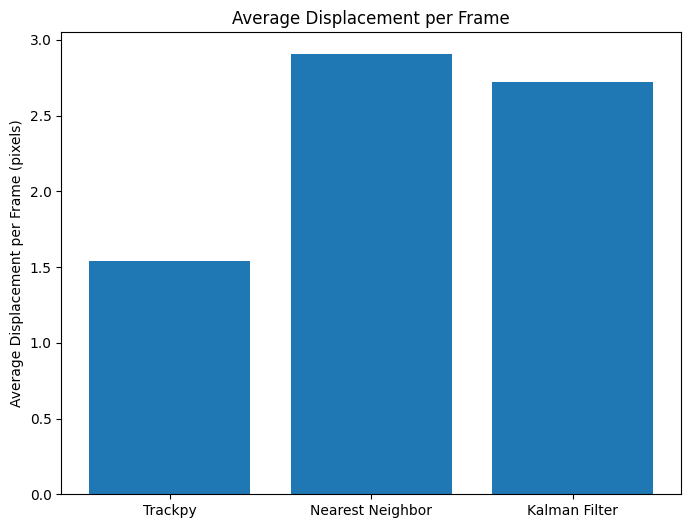

In [31]:
# Bar plot of average displacements
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['method'], metrics_df['avg_displacement'])
plt.ylabel('Average Displacement per Frame (pixels)')
plt.title('Average Displacement per Frame')
plt.show()

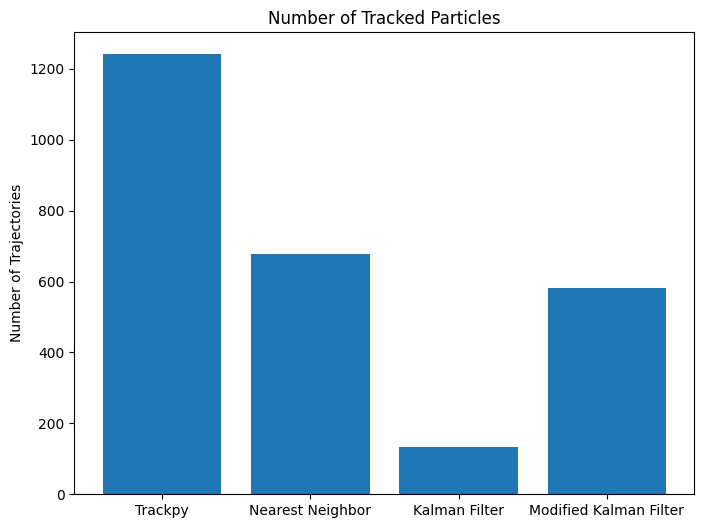

In [32]:
# Bar plot of number of trajectories
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['method'], metrics_df['num_trajectories'])
plt.ylabel('Number of Trajectories')
plt.title('Number of Tracked Particles')
plt.show()